<h1><center> UFU - Universidade Federal de Uberlândia</center></h1>

<h2><center>Graduação em Engenharia Civil</center></h2>

<h3><center>INICIAÇÃO CIENTÍFICA</center><br>
TÍTULO: DESENVOLVIMENTO DE MODELOS DE PREVISÃO DE CHUVAS USANDO
APRENDIZADO DE MÁQUINA <br>
<br>
ALUNO: Pedro Augusto Toledo Rios</h3>

<p>Este notebook é referente à Iniciação Ciêntífica na área de Ciência da Computação/Ánalise de Dados .</p>

# Classificação 

## Importações e Configurações Iniciais

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sn

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import  metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression

# Análise Exploratória dos Dados

In [3]:
#Tratamento de dados
missing_values = ['n/a','na','*****','*','*******',' -', '******', '5..84', '3..66', '3.3.21', '1..41', '********', '3.7.94', '354.59*', '564..79', '5.04.24', '21:36','**********', '***', '*********', '03:18', '00:00', '03:48', '08:42', '03:06', '09:06', '01:30', '07:48', '09:12', '10:18', '01:24', '#VALUE!' , '926,4923,8', '27/07/1902**21:36:00', '-']

dados_clima = pd.read_csv('C:/Users/riospedro/OneDrive - Universidade Federal de Uberlândia/Área de Trabalho/python 05-11/pesquisa/dadosclimaatt.csv', header = None, sep=';', na_values=missing_values)
dados_clima.columns=['Temp Máx (°C)', 'Temp Mín (°C)', 'Temp Média (°C)', 'Velocidade do Vento (km/h)', 'Radiação solar (cal/cm²/h)', 'Pressão (mb)', 'UR (%)', 'Chuva (mm)', 'Dia','Mês', 'Ano', 'Data', 'Data2']
dados_clima['UR (%)'] = dados_clima['UR (%)'].str.replace(':', '.')
dados_clima['Pressão (mb)'] = dados_clima['Pressão (mb)'].str.replace(',,', '.')
dados_clima['UR (%)'] = dados_clima['UR (%)'].astype(float)
dados_clima['Pressão (mb)'] = dados_clima['Pressão (mb)'].astype(float)
dados_clima['Ano'] = dados_clima['Ano'].str.replace(',,', '')
dados_clima['Ano'] = dados_clima['Ano'].astype(int)
combine = [dados_clima]
chuva = dados_clima['Chuva (mm)']
dados_clima.head()
dados_clima.dropna()
print(dados_clima.isnull().sum())

Temp Máx (°C)                  124
Temp Mín (°C)                  122
Temp Média (°C)                110
Velocidade do Vento (km/h)     528
Radiação solar (cal/cm²/h)     476
Pressão (mb)                   400
UR (%)                        1865
Chuva (mm)                     277
Dia                              0
Mês                              0
Ano                              0
Data                             0
Data2                            0
dtype: int64


### Informações de cada coluna do dataframe

In [4]:
dados_clima.describe()


,Temp Máx (°C),Temp Mín (°C),Temp Média (°C),Velocidade do Vento (km/h),Radiação solar (cal/cm²/h),Pressão (mb),UR (%),Chuva (mm),Dia,Mês,Ano
count,13297.000000,13299.000000,13311.000000,12893.000000,12945.000000,13021.000000,11556.000000,13144.000000,13421.000000,13421.000000,13421.000000
mean,27.886343,14.175675,21.049129,3.234452,369.640664,933.542209,72.104533,4.094814,15.727517,6.491916,2000.876909
std,3.788595,4.073522,3.482316,2.713455,126.883069,191.737274,16.016968,10.548043,8.799279,3.439691,10.608740
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1983.000000
25%,25.800000,11.400000,18.900000,1.550000,286.240000,929.000000,64.000000,0.000000,8.000000,4.000000,1992.000000
50%,28.200000,14.900000,21.500000,2.530000,363.920000,933.400000,73.500000,0.000000,16.000000,7.000000,2001.000000
75%,30.600000,17.400000,23.700000,4.100000,457.420000,937.400000,82.200000,1.800000,23.000000,9.000000,2010.000000
max,39.200000,28.600000,34.200000,99.200000,1019.570000,9925.800000,905.000000,158.400000,31.000000,12.000000,2019.000000


### Criação de uma nova classe que determina se naquele dia choveu ou não

In [5]:
#dados_clima['Choveu?']= chuva

# Loop que preenche a nova coluna com 0(não choveu) e 1(choveu)
for dados_clima in combine:    
    dados_clima.loc[ dados_clima['Chuva (mm)'] == 0, 'Choveu?'] = 0
    dados_clima.loc[(dados_clima['Chuva (mm)'] > 0), 'Choveu?'] = 1

#Visualização das primeiras cinco linhas da tabela
dados_clima.head()   
    

,Temp Máx (°C),Temp Mín (°C),Temp Média (°C),Velocidade do Vento (km/h),Radiação solar (cal/cm²/h),Pressão (mb),UR (%),Chuva (mm),Dia,Mês,Ano,Data,Data2,Choveu?
0,26.8,14.0,20.4,3.39,340.16,926.1,88.5,23.6,1,1,1983,01/01/1983,jan/83,1.0
1,27.2,13.0,20.1,3.02,340.16,927.6,86.6,20.4,2,1,1983,02/01/1983,jan/83,1.0
2,27.4,17.2,22.3,5.97,370.18,930.0,87.2,21.2,3,1,1983,03/01/1983,jan/83,1.0
3,28.2,17.0,22.6,4.25,420.20,931.3,8.0,0.0,4,1,1983,04/01/1983,jan/83,0.0
4,29.0,18.2,23.6,3.25,160.08,931.4,91.8,40.0,5,1,1983,05/01/1983,jan/83,1.0


In [6]:
#Tratar os Missing Values (Valores Ausentes)

dados_clima['Temp Mín (°C)'].fillna(method='ffill',inplace = True)   #ffill => preencher com a última temperatura antes do Missing Value
dados_clima['Temp Média (°C)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última temperatura antes do Missing Value
dados_clima['Velocidade do Vento (km/h)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última velocidade antes do Missing Value
dados_clima['Radiação solar (cal/cm²/h)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última radiação antes do Missing Value
dados_clima['UR (%)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última taxa UR antes do Missing Value
dados_clima['Chuva (mm)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última quantidade antes do Missing Value
dados_clima['Pressão (mb)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última pressão antes do Missing Value
dados_clima['Choveu?'].fillna(method='ffill',inplace = True) #ffill => preencher com a última pressão antes do Missing Value
dados_clima['Temp Máx (°C)'].fillna(method='ffill',inplace = True)   #ffill => preencher com a última temperatura antes do Missing Value
dados_clima['Choveu?'] = dados_clima['Choveu?'].dropna()



#verificar os missing values após a imputação acima
print('\nMissing Values no dataframe  após o tratamento:\n',dados_clima.isnull().sum(), sep="")


Missing Values no dataframe  após o tratamento:
Temp Máx (°C)                 0
Temp Mín (°C)                 0
Temp Média (°C)               0
Velocidade do Vento (km/h)    0
Radiação solar (cal/cm²/h)    0
Pressão (mb)                  0
UR (%)                        0
Chuva (mm)                    0
Dia                           0
Mês                           0
Ano                           0
Data                          0
Data2                         0
Choveu?                       0
dtype: int64


C:\Users\riospedro\AppData\Local\Temp\ipykernel_6572\3475542657.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dados_clima['Temp Mín (°C)'].fillna(method='ffill',inplace = True)   #ffill => preencher com a última temperatura antes do Missing Value
C:\Users\riospedro\AppData\Local\Temp\ipykernel_6572\3475542657.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dados_clima['Temp Média (°C)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última temperatura antes do Missing Value
C:\Users\riospedro\AppData\Local\Temp\ipykernel_6572\3475542657.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dados_clima['Velocidade do Vento (km/h)'].fillna(method='ffill',inplace = True) #ffill => preencher com a últim

In [7]:
# Usamos a correlação de Pearson e ordenamos os valores
columns_corr = dados_clima.corr(method='pearson')['Choveu?'].sort_values()
print(columns_corr)

ValueError: could not convert string to float: '01/01/1983'

### Linhas de código que permitem selecionar só uma parte do dataframe, no caso o período interessado.

In [8]:
# 70% para treino / 30% para teste

data_inicio = 1980
data_fim = 2020
data_inicio_treinamento = 1980
data_fim_treinamento = 2008
data_inicio_teste = 2009
data_fim_teste = 2019

dadosparateste = dados_clima.copy()



In [9]:
dadosparateste.drop(columns = ['Chuva (mm)'], axis = 1, inplace=True)

#  Modelos de Aprendizado de Máquina (Machine Learning)

## Criação de um dataframe de Treinamento e Teste

In [10]:
#Criar os dataframe de Treinamento e Teste
df_train =  dadosparateste[dadosparateste['Ano'] >= data_inicio_treinamento]
df_train =  dadosparateste[dadosparateste['Ano'] <= data_fim_treinamento]
df_test = dadosparateste[dadosparateste['Ano'] >= data_inicio_teste]
df_test =  dadosparateste[dadosparateste['Ano'] <= data_fim_teste]

x_train = df_train.iloc[:,0:10]
y_train = df_train[['Choveu?']]

x = df_test.iloc[:,0:10]
y = df_test[['Choveu?']]

x.head()

,Temp Máx (°C),Temp Mín (°C),Temp Média (°C),Velocidade do Vento (km/h),Radiação solar (cal/cm²/h),Pressão (mb),UR (%),Dia,Mês,Ano
0,26.8,14.0,20.4,3.39,340.16,926.1,88.5,1,1,1983
1,27.2,13.0,20.1,3.02,340.16,927.6,86.6,2,1,1983
2,27.4,17.2,22.3,5.97,370.18,930.0,87.2,3,1,1983
3,28.2,17.0,22.6,4.25,420.20,931.3,8.0,4,1,1983
4,29.0,18.2,23.6,3.25,160.08,931.4,91.8,5,1,1983


## Modelo 1 - Random Forest Classifier para determinar se choveu ou não

## Treinar e Testar o Modelo

In [11]:
model = RandomForestClassifier(n_estimators = 100, max_depth =5, random_state=1)
model.fit(x, y) # Treina o modelo
y_pred = model.predict(x_train) # Testa o Modelo


C:\Users\auped\AppData\Local\Temp\ipykernel_17128\3332098698.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x, y) # Treina o modelo


In [12]:
#Atualização de Variáveis
y_test1 = y_train
y_pred1 = y_pred

## Modelo 1 - XGBoost para determinar se choveu ou não

In [12]:

#Criando objet classeifer XGBoost
XGboost = xgb.XGBClassifier()
 
#Treinando o XGBoost Classifer
modelxgb = XGboost.fit(x, y)

#Testando 

y_pred4 = modelxgb.predict(x_train)




c:\Users\riospedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\riospedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\riospedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\riospedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future ve

In [23]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

### Score

In [13]:
print('Precision: %.3f' % precision_score(y_train, y_pred4))
print('Accuracy: %.3f' % accuracy_score(y_train, y_pred4))
print('Recall: %.3f' % recall_score(y_train, y_pred4))


Precision: 0.903
Accuracy: 0.918
Recall: 0.842


In [25]:
print(len(y_pred4))

9496


In [26]:
chuvaprevista = []
for z in range(len(y_pred4)):
    #print(y_pred4[z])
    chuvaprevista.append(y_pred4[z])
    
df_train['Previsão']= chuvaprevista
df_train.head()    

C:\Users\auped\AppData\Local\Temp\ipykernel_17128\164513570.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Previsão']= chuvaprevista


,Temp Máx (°C),Temp Mín (°C),Temp Média (°C),Velocidade do Vento (km/h),Radiação solar (cal/cm²/h),Pressão (mb),UR (%),Dia,Mês,Ano,Data,Data2,Choveu?,Previsão
0,26.8,14.0,20.4,3.39,340.16,926.1,88.5,1,1,1983,01/01/1983,jan/83,1.0,1.0
1,27.2,13.0,20.1,3.02,340.16,927.6,86.6,2,1,1983,02/01/1983,jan/83,1.0,0.0
2,27.4,17.2,22.3,5.97,370.18,930.0,87.2,3,1,1983,03/01/1983,jan/83,1.0,1.0
3,28.2,17.0,22.6,4.25,420.20,931.3,8.0,4,1,1983,04/01/1983,jan/83,0.0,0.0
4,29.0,18.2,23.6,3.25,160.08,931.4,91.8,5,1,1983,05/01/1983,jan/83,1.0,1.0


In [27]:
#Salvamento dos dados em csv

df_train.to_excel("classificaçãogeral.xlsx")

# Matrizes de Confusão

## Modelo  - XGBoost

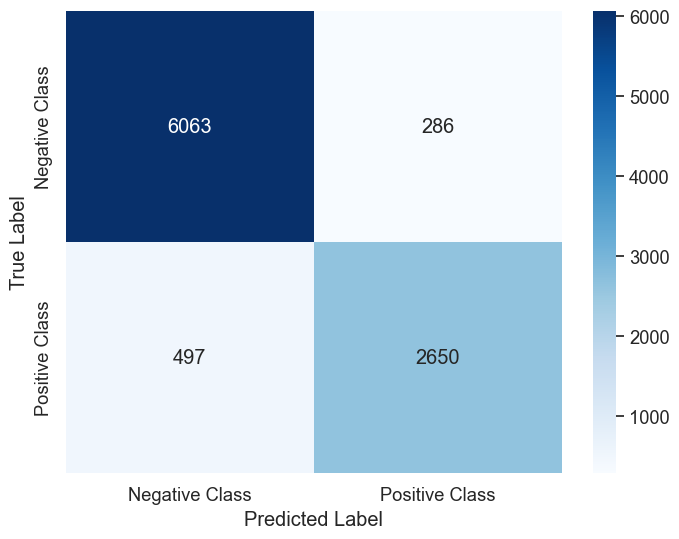

In [14]:
cm = confusion_matrix(y_train, y_pred4)

# Definir rótulos das classes (substitua pelos seus próprios rótulos, se necessário)
class_names = ['Negative Class', 'Positive Class']

# Plotar a matriz de confusão usando Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajuste o tamanho da fonte

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()